# cineSYNC: Navigating the Stream to Success
**An Exploratory Approach to Personalized Recommendation Systems**

<img src="Images/cineSYNC_logo.png" alt="CineSYNC Logo" width="300" height="200">

# Business Understanding
### Our Primary Stakeholder
Our protagonist in this story is cineSYNC, a veteran streaming service that's resurrecting itself out of obscurity. Established in 2006 and operating as "the people's streaming service" ever since, the platform's many users celebrate the outdated, low-tech simplicity of its straightforward movie library and basic UI akin to that of vintage piracy sites like Levidia.ch or Project Free TV. Bolstered by recent investments, cineSYNC has set its sights on a major transformation, aiming to provide a more personalized user experience competitive with industry heavyweights like Netflix and HBO Max, while maintaining their integrity as a universally approachable brand and affordable service. Deviating from their longstanding ads-only revenue model, cineSYNC is prepared to offer low-cost subscriptions in exchange for user profiles, rating options, and customized title recommendations, recognizing that the key to success lies in aligning with user tastes and meeting user preferences. 

### Our Mission
Our mission is to introduce cineSYNC to the basics and intricacies of user-based recommendation systems. We'll delve into various collaborative filtering techniques such as Singular Value Decomposition (SVD) and Alternating Least Squares (ALS), demystify the underlying concepts, and evaluate model performance. Collaborative filtering, a key focus of our exploration, involves recommending items based on the preferences and behavior of similar users. This approach, in contrast to content-based or hybrid filtering systems, harnesses the collective wisdom of the user community, allowing cineSYNC to tap into the diverse tastes of its audience.

#### Why Collaborative Filtering?
Collaborative filtering holds a distinct advantage in capturing complex and evolving user preferences. Unlike content-based approaches, which rely on item characteristics, collaborative filtering adapts dynamically to user behavior, making it well-suited for platforms like cineSYNC with a vast and diverse content library. By leveraging the wisdom of the crowd, collaborative filtering facilitates personalized recommendations, enhancing user satisfaction and engagement.

#### Model Evaluation Metrics
Throughout our exploratory journey, we will use model evaluation metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) as our guiding compass. These metrics allow us to quantify the accuracy of our recommendation models, providing cineSYNC with tangible insights into the effectiveness of the implemented collaborative filtering techniques.

With our foundational support, cineSYNC can not only navigate the intricacies of recommendation systems but also emerge as a formidable contender among industry giants. 

# Data Understanding
<img src="Images/grouplens_logo.png" alt="grouplens logo" width="300" height="200">

In this project, we will be working with the MovieLens dataset provided by the GroupLens research lab at the University of Minnesota. The dataset is a well-known resource in the field of recommendation systems and contains information about movies, user ratings, and user-generated tags.
### Dataset Components
The dataset is distributed in the ml-latest-small.zip archive and contains the following four CSV files:


**`ratings.csv:`** This file contains user ratings for various movies. This dataset will likely be the primary source for building our recommendation system based on collaborative filtering.

**`movies.csv:`** This file contains information about movies, including their unique identifiers.

**`tags.csv:`** This file contains user-generated tags for movies. While not the focus of our exploration in collaborative filtering, it is worth highlighting here for the purposes of cineSYNC's future content-based or hybrid modeling endeavors.

**`links.csv:`** This file contains links to external movie databases. This external data could be useful to cineSYNC, but do not fit within the scope of our project.

# Data Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will now load each .csv file as Pandas DataFrames, and inspect `ratings_df`, as it will be our primary source of data for collaborative filtering:

In [2]:
# Loading MovieLens dataset, presented in 4 .csv files
ratings_df = pd.read_csv('Data/ratings.csv')
movies_df = pd.read_csv('Data/movies.csv')
tags_df = pd.read_csv('Data/tags.csv')
links_df = pd.read_csv('Data/links.csv')

#### Inspecting and filtering `ratings_df`

Lets call the .head() function to get column names:

In [3]:
# Inspecting first 5 rows of `ratings_df`
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Upon superficial inspection, we see that `ratings_df`  consists of four features: `userId`, `movieId`, `rating`, and `timestamp`. We can conclude:

- `userId` represents the unique identifier of users.
- `movieId` represents the unique identifier of movies.
- `rating` column contains the ratings assigned by users to the movies.
- `timestamp` indicates when in the movie viewing time the rating was recorded.

In [4]:
# Getting shape of `ratings_df`
ratings_df.shape

(100836, 4)

After viewing the shape of `ratings_df`, we see that there are 100,836 rows, or data points. That's a lot of data points, despite the fact that we've loaded the *condensed* version of the MovieLens dataset. We might consider filtering down `ratings_df` for the purposes of our project.

In [5]:
# Checking for null values in `ratings_df`
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Using the .isnull() and .sum() functions to get a total of null (NaN) values, it looks like the DataFrame is complete with no missing values.

In [6]:
# Getting primary statistics of `ratings_df`
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Above, we've obtained primary statistical information about the ratings_df DataFrame using the describe() function to obtain central tendencies and data spread.
- The mean rating is approximately 3.50, indicating a relatively balanced distribution of ratings.
- The minimum and maximum ratings are 0.5 and 5.0, respectively.
- The dataset includes users with userId ranging from 1 to 610 and a total number of movieId's ranging from 1 to 193,609.
- The timestamp column may not be directly relevant to our collaborative filtering, as it represents the timestamp of ratings.

#### Filtering `ratings_df`

To manage the data within the scope of our project, we will filter the `ratings_df` DataFrame to focus on movies that meet specific criteria. This filtering will help us narrow down the dataset for a more efficient representation of modeling and analysis:

In [7]:
# Filtering out movies with ratings under 3.5 stars
min_rating_threshold = 3.5
filtered_ratings_df = ratings_df[ratings_df['rating'] >= min_rating_threshold]

# Filtering out movies with too few ratings (adjust min_ratings as needed)
min_ratings = 50
filtered_ratings_df = filtered_ratings_df.groupby('movieId').filter(lambda x: len(x) >= min_ratings)

Above, we've established a minimum rating threshold of 3.5 stars (min_rating_threshold). Movies with ratings below this threshold will be excluded from our analysis. The code filters the ratings_df DataFrame, retaining only rows where the 'rating' column is greater than or equal to 3.5. This ensures that we focus on movies that are generally well-received by users.

In [8]:
filtered_ratings_df.shape

(21464, 4)

With `filtered_ratings_df`, we are now able to work with a smaller, more mangeable subset of our original `ratings_df`.

#### Visualizing distribution of ratings in `filtered_ratings_df`

Let's take a look at the distribution of ratings in `filtered_ratings_df` by plotting the 'rating' feature below: 

Text(0, 0.5, 'Count')

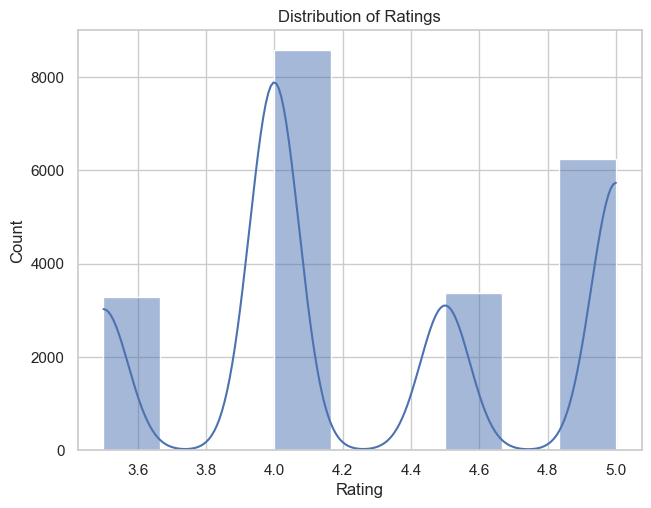

In [9]:
# Plot 1: Distribution of Ratings

# Setting the style for plot 
sns.set(style="whitegrid")
#  Creating figure, setting figsize
plt.figure(figsize=(16, 12))
# Creating subplot within figure, specifying grid layout
plt.subplot(2, 2, 1)
#Creating histogram of 'rating' feature, setting bins and parameters
sns.histplot(filtered_ratings_df['rating'], bins=9, kde=True)
# Setting plot title
plt.title('Distribution of Ratings')
# Labelling axes
plt.xlabel('Rating')
plt.ylabel('Count')

From the plot above, it appears a majority of movies have been rated at around 4.0. Let's continue with some feature engineering and plotting to get a larger sense of user ratings. These engineered features will serve us only in our EDA and provide overarching insight and won't necessarily be used in modeling.

#### Feature engineering & data visualization of `filtered_ratings_df

As our first engineered feature, we'll calculate the average rating for each movie. This feature could provide insights into the overall popularity and user sentiment toward the movie set as a whole:

In [10]:
# Calculating average ratings for each movie by grouping filtered_ratings_df by 'movieId' and calculating the 
# mean, creating a new DataFrame `average_ratings`.
average_ratings = filtered_ratings_df.groupby('movieId')['rating'].mean().reset_index()

# Renaming the 'rating' column in average_ratings to 'avg_rating' to distinguish from the original 'rating'
average_ratings.rename(columns={'rating': 'avg_rating'}, inplace=True)

# Merging average_ratings into filtered_ratings_df based on 'movieId' to associate average ratings with movie 
# ratings, using a left join to retain all rows from the left DataFrame while matching average ratings where 
# available from the right
filtered_ratings_df = filtered_ratings_df.merge(average_ratings, on='movieId', how='left')

Now, let's visualize the distribution of our new feature `average_ratings`:

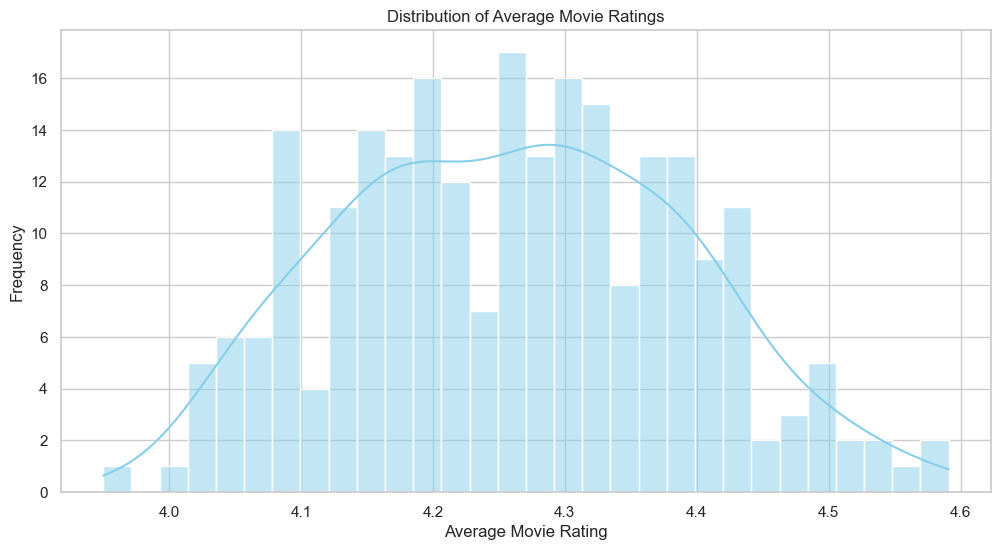

In [11]:
# Plot 2: Distribution of Avg Movie Ratings

# Setting the style for the plots
sns.set(style="whitegrid")
# Creating a figure with subplots
plt.figure(figsize=(12, 6))
# Creating histogram, setting bins and parameters
sns.histplot(average_ratings['avg_rating'], bins=30, kde=True, color='skyblue')
# Setting axes labels and title
plt.xlabel('Average Movie Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Movie Ratings')
# Showing the plot
plt.show()

The above plot provides clarity from our first plot, showing the average movie rating in indeed our dataset is somewhere between 4.0 and 4.4.

Let's now create a feature that represents the number of ratings each movie has received. This can help us understand how well-known and frequently rated a movie is, and might even be a contender for use in modeling:

In [12]:
# Calculating the number of ratings for each movie by grouping filtered_ratings_df by 'movieId' and 
# counting the ratings, creating a new DataFrame `num_ratings`
num_ratings = filtered_ratings_df.groupby('movieId')['rating'].count().reset_index()

# Renaming the 'rating' column in num_ratings to 'num_ratings' for distinction from original 'rating'
num_ratings.rename(columns={'rating': 'num_ratings'}, inplace=True)

# Merging num_ratings into filtered_ratings_df based on 'movieId' to associate the number of ratings with 
#movie ratings, using a left join to retain all rows from the left DataFrame while matching the number of 
#ratings where available from the right
filtered_ratings_df = filtered_ratings_df.merge(num_ratings, on='movieId', how='left')

Now, let's visualize the distribution of our new feature 'num_ratings':

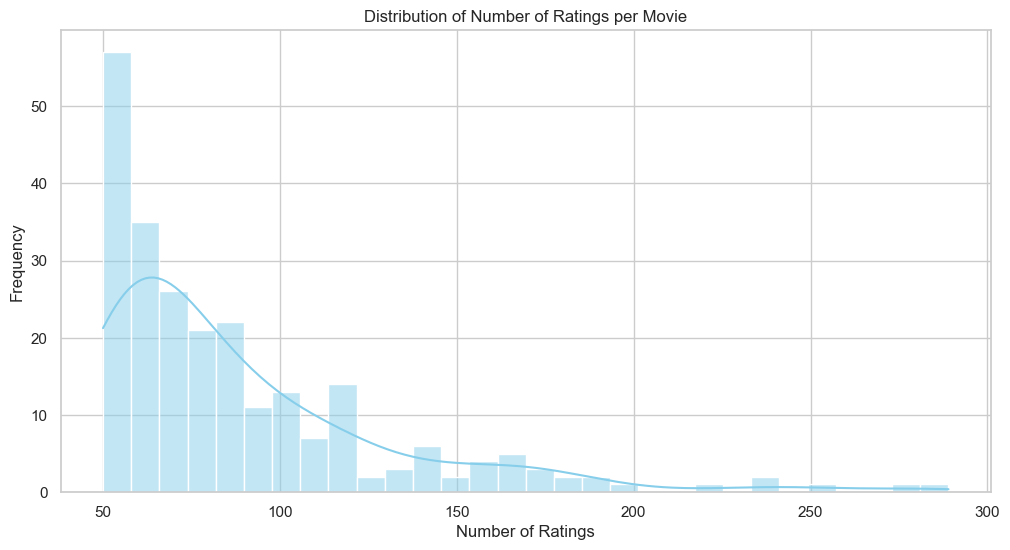

In [13]:
# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a figure, setting figsize
plt.figure(figsize=(12, 6))

# Creating histogram subplot, setting bins and parameters
sns.histplot(num_ratings['num_ratings'], bins=30, kde=True, color='skyblue')

# Setting axes labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per Movie')

# Showing the plot
plt.show()


This plot reveals that the dataset contains many movies with a relatively low number of ratings, while a few movies have a substantially higher number of ratings. This positive, right-skewed distribution is typical in user-generated rating data, and could be useful for modeling, though that is still unclear.

Let's continue our feature engineering segment by creating `avg_user_rating`:

In [14]:
# Calculating the average rating for each user
average_user_ratings = filtered_ratings_df.groupby('userId')['rating'].mean().reset_index()

# Renaming the 'rating' column to 'avg_user_rating'
average_user_ratings.rename(columns={'rating': 'avg_user_rating'}, inplace=True)

# Merging the average user ratings back into the original dataframe based on 'userId'
filtered_ratings_df = filtered_ratings_df.merge(average_user_ratings, on='userId', how='left')

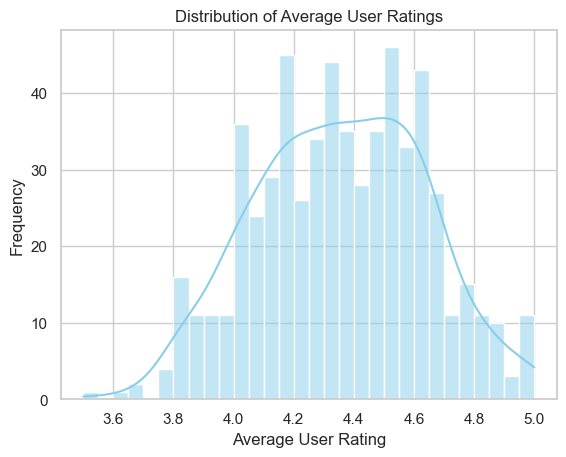

In [15]:
# Plotting a histogram of the average user ratings using Seaborn
sns.histplot(average_user_ratings['avg_user_rating'], bins=30, kde=True, color='skyblue')

# Setting plot title and axes labels
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average User Ratings')

# Showing the plot
plt.show()

From the plot above, we see a pretty normal distribution of our new feature `avg_user_rating.` This feature might be helpful in modeling, thought we won't unless we decide to use it in modeling.

For our final data cleaning maneurver in filtered_ratings_df, we'll drop the `timestamp` feature, as it won't necessarily be helpful to us in our collaborative filtering modeling:

In [16]:
# Dropping 'timestamp' feature
filtered_ratings_df = filtered_ratings_df.drop('timestamp', axis=1)

#### Inspecting  `movies_df`
It's time to inspect `movies_df` and see what titles, genres, DataFrame shape, and null values we are working with:

In [17]:
# Inspecting head of 'movies_df'
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
# Getting shape of DataFrame
movies_df.shape

(9742, 3)

In [19]:
# Checking for null values
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

#### Visualizing distribution of genres in `movies_df`

Let's plot the distribution of genres in `movies_df`:

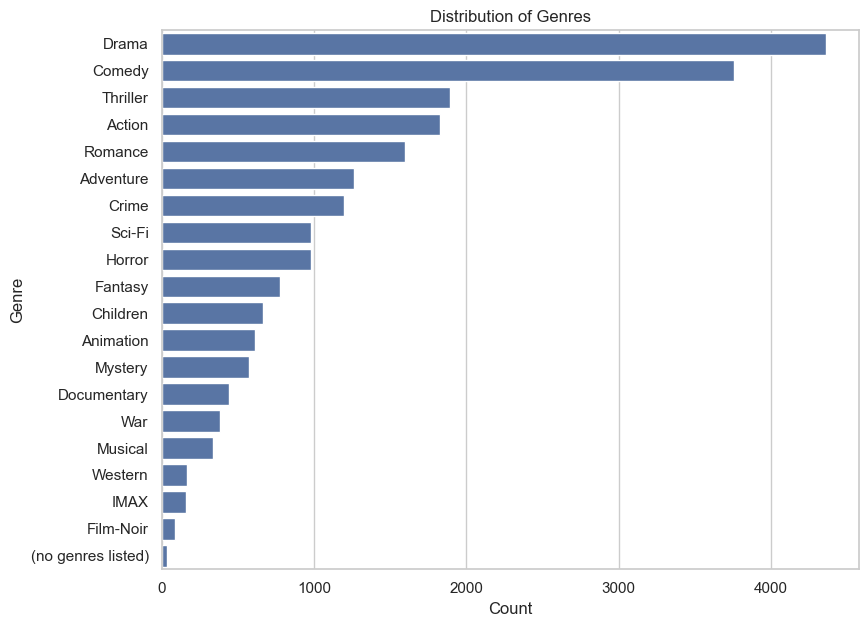

In [20]:
# Setting fig size for plot
plt.figure(figsize=(16, 12))

# Creating a subplot in a 2x2 grid and selecting the third subplot
plt.subplot(2, 2, 3)

# Splitting the 'genres' column in the movies dataframe and creating a stacked countplot
genres = movies_df['genres'].str.split('|', expand=True).stack()
sns.countplot(y=genres, order=genres.value_counts().index)

# Setting plot title and axes labels
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Adjusting layout for better spacing and showing the plot
plt.tight_layout()
plt.show()

Above, we see Drama, Comedy and Thriller among the most frequently rated films among users in the dataset. If we are to use `movies_df` in any meaningful way, we might as well get dummy variables for the 'genres' column and concatenate 

In [21]:
# Creating dummy variables for the 'genres' column using one-hot encoding
genres_dummies = movies_df['genres'].str.get_dummies(sep='|')

# Concatenating the original movies dataframe with the genre dummy variables
movies_df = pd.concat([movies_df, genres_dummies], axis=1)

In [22]:
# Creating a copy of the movies dataframe for encoding
encoded_movies_df = movies_df.copy()

# Specifying and dropping 'genres' columns to be dropped from the encoded dataframe
columns_to_drop = ['genres', '(no genres listed)']
encoded_movies_df.drop(columns=columns_to_drop, inplace=True)

In [23]:
# Setting the Seaborn style to whitegrid
sns.set(style="whitegrid")

# Extracting the genre columns from the encoded movies dataframe
genre_columns = encoded_movies_df.columns[2:]  # Assuming the genre columns start from the third column

# Calculating the number of genres, rows, and columns for the subplot grid
num_genres = len(genre_columns)
num_cols = 3  # Number of columns in each row
num_rows = (num_genres + num_cols - 1) // num_cols  # Calculate the number of rows

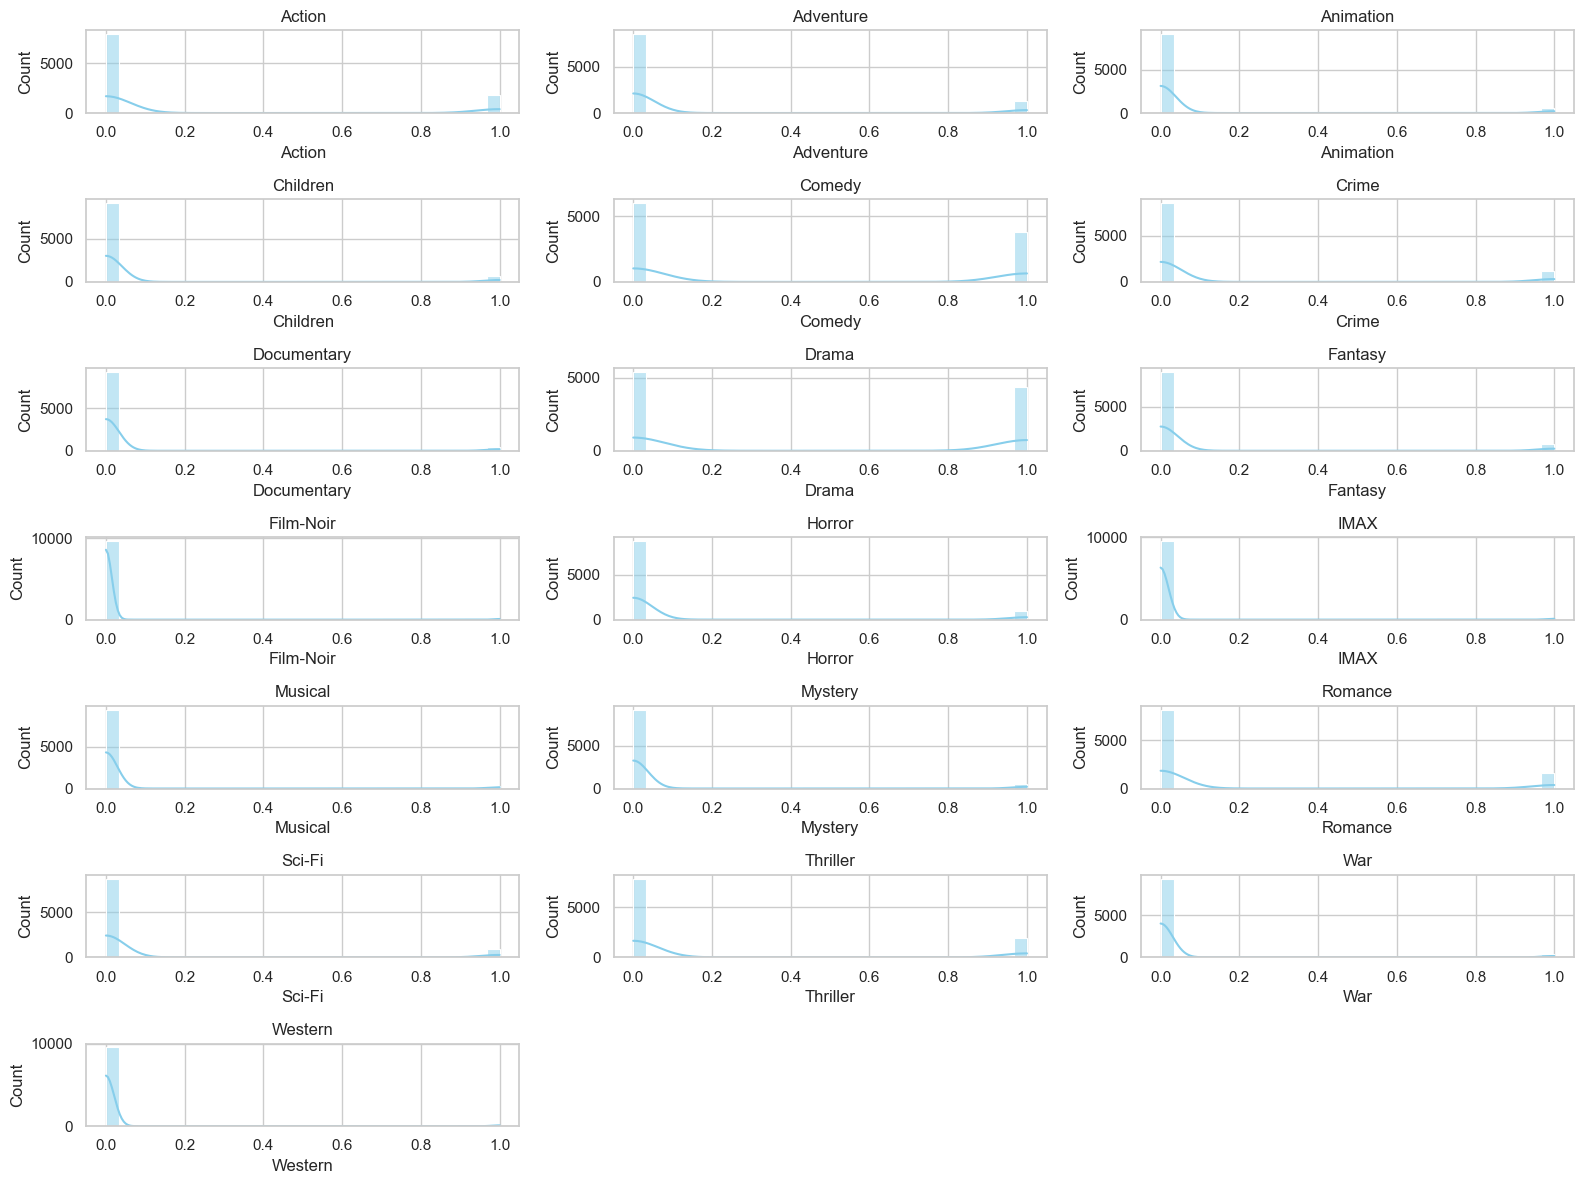

In [24]:
# Create a subplot grid with specified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Creating a for loop to iterate through genre columns and create histograms in subplots

for i, genre in enumerate(genre_columns):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]

    # Plotting a histogram for each genre
    sns.histplot(encoded_movies_df[genre], bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(genre)

# Removing excess empty subplots if there are fewer genres than expected
for i in range(num_genres, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjusting layout and showing the plot
fig.tight_layout()
plt.show()

In [25]:
# Merging the filtered ratings dataframe with the encoded movies dataframe based on 'movieId' using an inner join
movies_and_ratings_df = filtered_ratings_df.merge(encoded_movies_df, on='movieId', how='inner')

In [26]:
# Inspecting head of new dataframe
movies_and_ratings_df.head()

,userId,movieId,rating,avg_rating,num_ratings,avg_user_rating,title,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,4.284848,165,4.685714,Toy Story (1995),0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,4.284848,165,4.333333,Toy Story (1995),0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,4.284848,165,4.250000,Toy Story (1995),0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,17,1,4.5,4.284848,165,4.389706,Toy Story (1995),0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,18,1,3.5,4.284848,165,4.092466,Toy Story (1995),0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Checking for null values in new dataframe
movies_and_ratings_df.isnull().sum()

userId             0
movieId            0
rating             0
avg_rating         0
num_ratings        0
avg_user_rating    0
title              0
Action             0
Adventure          0
Animation          0
Children           0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
IMAX               0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
dtype: int64

**NOTE:** *For our purposes, going to the trouble of one-hot encoding and merging the movies and ratings data together in this way is for EDA, and for further explorations into content-based filtering or hybrid systems. Since we are focusing on collaborative filtering, though, this was just to orient ourselves to the distribution of the data.*

# Modeling

### Evaluation Metrics

#### RMSE (Root Mean Squared Error):
RMSE measures the average magnitude of the differences between predicted and actual values, emphasizing larger errors. For cineSYNC, a lower RMSE indicates better predictive accuracy and alignment with user preferences. The closer to 0, the more accurate.

#### MAE (Mean Absolute Error):
MAE gauges the average absolute differences between predicted and actual values, providing a more straightforward measure of model performance. Similar to RMSE, a lower MAE signifies better accuracy in predicting user preferences.

### Model 1: Alternating Least Squares (ALS) with PySpark

#### What is ALS?
The ALS (Alternating Least Squares) recommendation model is a supervised learning algorithm commonly employed in recommendation systems. Unlike traditional supervised learning, where the algorithm learns from labeled data with explicit input-output pairs, ALS operates in a unique manner within the collaborative filtering framework.

In supervised learning, the algorithm learns a mapping from input features to target labels based on a labeled training dataset. In contrast, ALS is employed in a semi-supervised fashion for collaborative filtering, which inherently lacks explicit labels. Instead, it utilizes the implicit feedback inherent in user-item interactions, such as user ratings, to capture underlying patterns in the data.

The ALS algorithm optimizes the latent factors by iteratively decomposing the user-item interaction matrix, minimizing the reconstruction error between observed and predicted ratings. This iterative optimization process is the hallmark of ALS, as it alternates between fixing one matrix (either user or item factors) and optimizing the other. Through this alternating process, ALS uncovers latent features that represent user preferences, facilitating the generation of accurate and personalized recommendations.

#### How is PySpark Used in the Context of ALS?
**PySpark,** the Python API for Apache Spark, offers a scalable and distributed computing framework ideal for large-scale collaborative filtering tasks. ALS in PySpark facilitates the training of models on extensive datasets, ensuring efficient handling of user-item interactions. This is particularly valuable for cineSYNC's ambition to provide a more personalized user experience at scale.

Let's begin.
To leverage the power of PySpark in implementing ALS, we begin by:
1. Importing SparkSession from the PySpark library 
2. Initializing a SparkSession. The SparkSession is a unified entry point for interacting with thhe Apache Spark infrastructure and serves as a central component for managing the execution of Spark jobs.

In [28]:
# Importing SparkSession
from pyspark.sql import SparkSession

In [30]:
# Building new SparkSession, setting name for Spark application, configuring Spark driver, creating session
spark = SparkSession.builder.appName("ALS Recommender").config("spark.driver.bindAddress", "127.0.0.1").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/13 18:18:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/13 18:18:36 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


Let's continue by...

3. ...importing ALS and Related Modules:

- The `ALS` class from `pyspark.ml.recommendation`. ALS is a collaborative filtering algorithm that PySpark provides for building recommendation models based on implicit or explicit user-item interactions.
- The `RegressionEvaluator` class from `pyspark.ml.evaluation`. This class is used for evaluating the performance of regression models, which includes ALS models.
- The `lit` and `col` functions from `pyspark.sql.functions`. These are used for creating literal values and column references, respectively, and are handy for manipulating and transforming DataFrames.
- The `Row` class from `pyspark.sql`. The Row class allows us to create structured rows, which are commonly used in PySpark DataFrames.

In [31]:
# Importing necessary classes and modules
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import lit, col
from pyspark.sql import Row

To ensure that operations dependent on randomness produce identical results each time they are run...

4. ...we are choosing an arbitrary but fixed  "seed" or parameter to impose on the .set() method. We're unsure if this will produce identical code each run, but we will set it nonetheless:

In [32]:
# Setting a random seed for Sparks SQL module (for reproducibility)
spark.conf.set("spark.sql.randomSeed", 42)

Let's continue with...

5. ... converting the existing Pandas DataFrame into a PySpark DataFrame, which is crucial for leveraging PySpark's distributed computing capabilities on large datasets. 

6. Then, we will set the number of partitions (manageable chunks of the dataset) for the PySpark DataFrame. Controlling the number of partitions is essential for optimizing data processing, especially when reading data from external sources. It helps ensure data consistency across runs and allows for efficient parallelism during distributed operations.

In [33]:
# Converting the Pandas DataFrame to a PySpark DataFrame
movies_and_ratings_df_spark = spark.createDataFrame(movies_and_ratings_df)

# Explicitly setting the number of partitions when reading data from external sources
# to ensure data consistency across runs
movies_and_ratings_df_spark = movies_and_ratings_df_spark.repartition(4)

Let's continue with data selection, splitting, building, fitting, and prediction generation:

7. **Data Selection:** We create a new PySpark DataFrame als_data by selecting relevant columns ('userId', 'movieId', 'rating') from the original DataFrame (`movies_and_ratings_df_spark`). This DataFrame will be used as input for the ALS model.
8. **Data Splitting:** The dataset is divided into training (80%) and testing (20%) sets using the `randomSplit` method. The training set is used to train the ALS model, while the testing set is reserved for evaluating its performance.
9. **Building the ALS Model:** We instantiate the ALS model with various parameters such as maximum number of iterations (`maxIter`), regularization parameter (`regParam`), rank of the feature matrices (`rank`), and others. 

In [34]:
# Selecting relevant columns for ALS model from the PySpark DataFrame
als_data = movies_and_ratings_df_spark.select('userId', 'movieId', 'rating')

# Splitting the data into training and testing sets
(training, test) = als_data.randomSplit([0.8, 0.2])

# Building the ALS model with seed
als = ALS(maxIter=10, regParam=0.01, rank=10, implicitPrefs=False, nonnegative=True, userCol='userId', itemCol='movieId', ratingCol='rating', seed=42, coldStartStrategy='drop')

10. **Fitting the model:** The model is then fitted to the training data using the `fit` method.
11. **Generating predictions:** The trained ALS model is used to generate predictions on the test data (test) with the `transform` method. These predictions will be compared to the actual ratings in the testing set to evaluate the model's accuracy.

In [35]:
# Fitting the model to the training data
als_model = als.fit(training)

# Generate predictions on the test data
als_preds = als_model.transform(test)

23/11/13 19:18:15 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/11/13 19:18:15 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


Now, we will utilize the trained ALS model to generate personalized movie recommendations for a specific user.

12. **Choosing userId**: We choose an abritrary user number: 123. This user's historical ratings will be used to predict *unrated* movies.

13. **Creating Movie Lists:** We generate a list of all unique movie IDs (`all_movie_ids`). Next, we identify movie IDs rated by the specified user (`user_rated_movies`). Then, we generate a list of unrated movies for the user by subtracting rated movies from all movies (`unrated_movies`).

In [36]:
# Setting the user ID for which we want to get recommendations
user_id = 123

# Generating a list of all movie IDs
all_movie_ids = movies_and_ratings_df_spark.select("movieId").distinct()

# Generating a list of movie IDs rated by the user
user_rated_movies = movies_and_ratings_df_spark.filter(col("userId") == user_id).select("movieId")

# Generating a list of unrated movies for the user
unrated_movies = all_movie_ids.subtract(user_rated_movies)

14. **Creating DataFrame for Unrated Movies:** Next, we create a new DataFrame (`user_123_unrated`) containing the unrated movies for the specified user (123). The user ID column is set to the specified user ID for consistency.
15. **Generating Predictions:** Finally, we utilize the trained ALS model (`als_model`) to generate predictions for the unrated movies by the specified user. The resulting DataFrame (`predictions`) contains the predicted ratings for each unrated movie, allowing us to recommend movies with the highest predicted ratings to the user.

In [37]:
# Creating a DataFrame for user 123's unrated movies
user_123_unrated = unrated_movies.withColumn('userId', lit(user_id))

# Generating predictions for unrated movies by user 123
predictions = als_model.transform(user_123_unrated)

Now, we'll perform post-processing on the predictions generated by the ALS model. This involves:

16. **Joining Predictions with Titles:** We join the predictions DataFrame (predictions) with the original DataFrame containing movie titles (movies_and_ratings_df_spark) based on the "movieId" column using an inner join. This step associates each predicted rating with its corresponding movie title.

17. **Ensuring Distinct Recommendations:** To avoid duplicate recommendations, we select distinct combinations of "movieId," "title," and "prediction" from the joined DataFrame.

In [38]:
# Joining predictions withh titles
recommendations_with_titles = predictions.join(movies_and_ratings_df_spark, ["movieId"], "inner")

# Ensuring distinct recommendations
distinct_recommendations = recommendations_with_titles.select("movieId", "title", "prediction").distinct()

18. **Sorting and Limiting Top Recommendations:** We sort the distinct recommendations by predicted rating in descending order, limiting the results to the top 10 recommendations using the limit(10) method.
19. **Displaying Top Recommendations:** Finally, we display the top 10 recommended movies with their titles, movie IDs, and predicted ratings, providing cineSYNC users with a concise and personalized list of movie recommendations.

In [39]:
# Sorting the predictions by predicted rating in descending order and limit to top 10
top_10_recommendations = distinct_recommendations.orderBy(col('prediction').desc()).limit(10)

# Showing the top 10 recommended movies with titles, movieId, and predictions
top_10_recommendations.show(truncate=False)

23/11/13 19:19:00 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------------------------------+----------+
|movieId|title                                      |prediction|
+-------+-------------------------------------------+----------+
|1234   |Sting, The (1973)                          |4.993845  |
|1203   |12 Angry Men (1957)                        |4.595272  |
|2700   |South Park: Bigger, Longer and Uncut (1999)|4.4975853 |
|3052   |Dogma (1999)                               |4.4910774 |
|2324   |Life Is Beautiful (La Vita è bella) (1997) |4.482935  |
|1278   |Young Frankenstein (1974)                  |4.4439654 |
|1625   |Game, The (1997)                           |4.427182  |
|51662  |300 (2007)                                 |4.376928  |
|6874   |Kill Bill: Vol. 1 (2003)                   |4.358449  |
|6      |Heat (1995)                                |4.2967734 |
+-------+-------------------------------------------+----------+



Awesome! We now have an example of our ALS model in action, with a list showing recommended movie titles and their predicted ratings for user 123. Obviously, in the real world, user 123 would likely rate movies using whole numbers on a scale of 0 - 5.0, so the predicted ratings give us a continuous estimate and show us in what direction the user leans.

### Evaluation
As previously stated, we will be using evaluation metrics Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) across the board for consistency. RMSE measures the *average squared difference between the predicted and actual ratings, taking the square root of the result*. MAE measures the average absolute differences between predicted and actual ratings.

Lower (relative closeness to 0) scores indicate a higher predictive accuracy for both metrics.

1. **RMSE Evaluation:** We create a `RegressionEvaluator` object to calculate the RMSE. The evaluate method is then applied to the ALS model predictions (als_preds), and the resulting RMSE value is stored in the variable als_rmse. The calculated RMSE is then printed:

In [40]:
# Creating a RegressionEvaluator for RMSE 
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
als_rmse = evaluator.evaluate(als_preds)

# Printing RMSE score
print("ALS RMSE:", als_rmse)

ALS RMSE: 0.5675458807986751


On average, the predicted ratings deviate from the actual ratings by approximately 0.57 units on a rating scale of 0 to 5.

2. **MAE Evaluation:** A separate `RegressionEvaluator` object is created for MAE. The evaluate method is applied to the ALS model predictions, and the resulting MAE value is stored in the variable als_mae. The printed output displays the calculated MAE, providing an additional metric to assess the accuracy of the ALS collaborative filtering model.

In [41]:
# Creating a RegressionEvaluator for MAE
mae_evaluator = RegressionEvaluator(metricName="mae", labelCol="rating", predictionCol="prediction")
als_mae = mae_evaluator.evaluate(als_preds)

# Printing MAE score
print("ALS MAE:", als_mae)

ALS MAE: 0.4511347670192109


On average, the absolute difference between predicted and actual ratings is approximately 0.45 units on a rating scale of 0 to 5.

Both the RMSE and MAE values for our ALS model are under 1.0, indicating that the ALS collaborative filtering model is performing well in predicting user ratings. Users can expect the predicted ratings to be reasonably close to their actual ratings, making the model a promising tool for generating accurate movie recommendations within the collaborative filtering framework. 

**NOTE:** *ALS is a stochastic algorithm. Stochastic algorithms introduce an element of randomness in their operations, leading to potentially different outcomes on each run, even with the same initial conditions. This randomness is intentional and often used to overcome challenges or limitations in deterministic algorithms. Though we took pains to set a seed for reproducibility of output, recommendations results and evaluation metrics may not be the same every time due to the distributed nature of Spark. However, running multiple iterations should provide insights into the stability of the recommendations.*

### Model 2: Singular Value Decomposition (SVD) with Surprise

#### What is SVD?
In the realm of collaborative filtering for recommendation systems, our second model introduces Singular Value Decomposition (SVD) implemented with the Surprise library. SVD is a dimensionality reduction technique that transforms the user-item interaction matrix into a lower-dimensional representation of itself, capturing latent factors that contribute to user preferences. 

SVD decomposes the user-item interaction matrix into three matrices: `U` (user matrix), `Σ` (diagonal matrix of singular values), and `V^T` (item matrix transpose). By retaining only the top singular values, SVD reduces the dimensionality of the original matrix, revealing latent factors that represent underlying patterns in the data.

While traditional supervised ML algorithms learn from labeled data with explicit input-output pairs, SVD (like ALS) utilizes implicit feedback from user-item interactions. In a supervised learning paradigm, SVD learns to predict user ratings (labels, whichh, although not explicitly labeled, serve as a form of implicit feedback that guides the learning process) for items based on historical ratings. The goal is to minimize the difference between predicted and actual ratings, just like a regression problem in supervised learning.

#### Why Surprise?
The Surprise library serves as a fitting choice for implementing SVD in our recommendation system. Here's why:
- **Ease of Use:** Surprise abstracts away the complexity of SVD implementation, providing an intuitive interface that simplifies the integration of collaborative filtering algorithms.
- **Efficient Algorithms:** Surprise is optimized for efficiency, leveraging well-established algorithms for collaborative filtering tasks. This efficiency is crucial, especially when working with large-scale datasets.

Before we begin, we will:

1. Import crucial functions and classes from the Surprise library:
- The `SVD` class implements the SVD algorithm.
- The `train_test_split` function allows us to seamlessly divide our dataset into training and testing sets, facilitating robust model evaluation.
- Surprise's `Dataset` and `Reader` classes play a pivotal role in preparing our data for the SVD model. The Reader class helps parse and define the rating scale of our dataset, while the Dataset class organizes the data into a format compatible with Surprise's recommendation algorithms.

In [42]:
# Importing necessary classes and functions
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import Dataset
from surprise import Reader

Next, we will:

2. **Set a random seed** to 42. 

3. **Employ the `Reader` class** to define the rating scale, specifying that ratings range from 0.5 to 5.0. 

4. **Call the `Dataset.load_from_df` method** to load the user-item-rating data from the `movies_and_ratings_df` DataFrame into a Surprise-compatible format.

In [43]:
# Setting a fixed random seed for reproducibility
random_seed = 42

# Creating a Surprise Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movies_and_ratings_df[['userId', 'movieId', 'rating']], reader)

Now we will:

5. **Split the data:** Apply the `train_test_split` function to split our data into train and test sets. With the addition of random_state=random_seed, we ensure that the split is deterministic, allowing us to consistently evaluate model performance across different iterations.

6. **Specify algorithm:** With our data prepared, we can then proceed to specify our collaborative filtering algorithm. The `SVD` class from Surprise is instantiated, and the `random_state` parameter is set to our fixed random seed to maintain consistency.

In [44]:
# Splitting the dataset into train and test sets with the fixed random seed using Surprise
trainset, testset = train_test_split(data, test_size=0.2, random_state=random_seed)

# Specifying the algorithm
algo = SVD(random_state=random_seed)

The process of training the model and generating predictions is central to understanding and evaluating its performance. We will:

7. **Fit the model** by calling the `fit` method train our collaborative filtering model on the training set (`trainset`).

8. **Generate predictions** by calling the `test` method to generate predictions on the testing set (`testset`).

In [45]:
# Training the model
algo.fit(trainset)

# Making predictions on the test set
algo_preds = algo.test(testset)

Now it's time to put the model to action and generate a list of unrated recommended movie titles for a given user. We will:

9. **Set the user as user 300.** This user's data will be used to predict ratings for unrated movies and recommend titles.

10. **Generate Unrated Movies List:** The `user_rated_movies` list is created by extracting the movie IDs that the user has already rated. It is derived from the testset variable, which likely contains the user's past interactions with movies. The `unrated_movies` list is generated by comparing all available movie IDs in the training set (trainset) with the movies that the user has rated. The result is a list of movies that the user has not yet rated, hence deemed "unrated."

11. **Predict Ratings for Unrated Movies:** The `predictions` list is formed by iterating over the `unrated_movies` list. For each movie ID in this list, the Surprise SVD model (`algo`) is used to predict the user's rating. The predictions are stored as tuples, where each tuple contains the movie ID and the predicted rating for User 300.

In [52]:
# Setting the user ID to 300
user_id_to_predict = 300

# Generating a list of unrated movies for the specified user
user_rated_movies = [movie[1] for movie in testset if movie[0] == user_id_to_predict]
unrated_movies = [movie_id for movie_id in trainset.all_items() if movie_id not in user_rated_movies]

# Creating a list of tuples containing (movie_id, predicted_rating) for unrated movies
predictions = [(movie_id, algo.predict(user_id_to_predict, movie_id).est) for movie_id in unrated_movies]

Next, we will:

12. **Sort Predictions:** The `top_10_recommendations` list of predictions is sorted in descending order based on the predicted ratings. The `key` function in the sorting process extracts the rating from each tuple.

13. **Fetch Movie Titles and Ratings:** The `top_10_titles_and_ratings` list is initialized to store tuples containing movie titles and their predicted ratings for the top 10 recommendations. A loop iterates over the sorted predictions, retrieves the corresponding movie title from the DataFrame `movies_and_ratings_df` DataFrame, and appends the title-rating tuple to the list. A check ensures that the movie title array is not empty before accessing its first element to avoid errors.

14. **Display Recommendations:** We present the top 10 movie recommendations to the user. The loop iterates over the `top_10_titles_and_ratings` list, displaying each movie's title and its predicted rating for user 300.

In [57]:
# Sorting the predictions by predicted rating in descending order
top_10_recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]

# Get the corresponding movie titles and predicted ratings for the top 10 recommendations
top_10_titles_and_ratings = []
for movie_id, rating in top_10_recommendations:
    movie_title_array = movies_and_ratings_df[movies_and_ratings_df['movieId'] == movie_id]['title'].values
    if len(movie_title_array) > 0:
        top_10_titles_and_ratings.append((movie_title_array[0], rating))
    else:
        # Handle the case where the movie title is not found
        top_10_titles_and_ratings.append(("Title Not Found", rating))

# Display the top 10 recommended movie titles and predicted ratings
for i, (title, rating) in enumerate(top_10_titles_and_ratings, 1):
    print(f"{i}. {title} - Predicted Rating: {rating:.2f}")

1. Heat (1995) - Predicted Rating: 4.50
2. Seven (a.k.a. Se7en) (1995) - Predicted Rating: 4.47
3. Usual Suspects, The (1995) - Predicted Rating: 4.42
4. Twelve Monkeys (a.k.a. 12 Monkeys) (1995) - Predicted Rating: 4.39
5. Casino (1995) - Predicted Rating: 4.33
6. Crimson Tide (1995) - Predicted Rating: 4.32
7. Taxi Driver (1976) - Predicted Rating: 4.30
8. Braveheart (1995) - Predicted Rating: 4.25
9. Title Not Found - Predicted Rating: 4.21
10. Title Not Found - Predicted Rating: 4.21


Great! We now have a sample recommendation list generated for user 300 using our SVD algorithm! Again, in the real world, our user is not likely to give a rating of, say, 4.47 or 4.39. These are just estimates that tell us *around* which ratings the user is likely to give.

### Evaluation
It's time to evaluate our model using our agreed upon metrics: RMSE and MAE. To reiterate, a lower (relative closeness to 0) score indicates a higher accuracy for both metrics. Again, RMSE measures the *average squared difference between the predicted and actual ratings, taking the square root of the result*, and MAE measures the *average absolute differences between predicted and actual ratings*.

To evaluate our SVD model, we will:

1. Import the `accuracy` module from the Surprise library
2. Call the `accuracy.rmse` function to compute the RMSE
3. Call the `accuracy.mae` function to compute the MAE

In [58]:
# Importing accuracy module 
from surprise import accuracy

In [59]:
# Calculating RMSE and MAE evaluation metrics
svd_rmse = accuracy.rmse(algo_preds)
svd_mae = accuracy.mae(algo_preds)

# Printing metrics
print(f'SVD Model RMSE: {svd_rmse}')
print(f'SVD Model MAE: {svd_mae}')

RMSE: 0.4751
MAE:  0.4044
SVD Model RMSE: 0.47507184170545486
SVD Model MAE: 0.40435890599639346


Our SVD model's RMSE score is 0.475, indicating that, on average, the model's predictions deviate from *actual* ratings by around 0.4751 units. We see a slight improvement with our SVD model compared to our ALS model in RMSE, jumping down from ~0.57 to 0.48.

Our SVD model's MAE score is 0.4044, indicating that, on average, the absolute difference between *predicted* and *actual* ratings is around 0.4044 units.

### Model 3: KNNWithMeans with Surprise

In [ ]:
from surprise import KNNWithMeans

In [ ]:
# Create a Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movies_and_ratings_df[['userId', 'movieId', 'rating']], reader)

# Build the training set
trainset = data.build_full_trainset()

In [ ]:
# Create the KNNWithMeans model
sim_options = {
    'name': 'cosine',  # You can choose similarity options like 'cosine' or 'pearson'
    'user_based': False,  # Set to True for item-based collaborative filtering
}
knn_model = KNNWithMeans(sim_options=sim_options)

In [ ]:
# Fit the KNN model on the training data
knn_model.fit(trainset)

# Make predictions with both models
knn_predictions = knn_model.test(testset)

In [ ]:
# Assuming you have user 57's ID and want recommendations for unrated movies
user_id = 57

# Get a list of all movie IDs
all_movie_ids = movies_and_ratings_df['movieId'].unique()

# Get movie IDs rated by user 57
user_rated_movies = movies_and_ratings_df.loc[movies_and_ratings_df['userId'] == user_id, 'movieId']

# Get unrated movies
unrated_movies = list(set(all_movie_ids) - set(user_rated_movies))

In [ ]:
# Create a list of (movieId, predicted_rating) for unrated movies
recommendations = [(movie_id, knn_model.predict(user_id, movie_id).est) for movie_id in unrated_movies]

# Sort the recommendations by predicted rating
sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

In [ ]:
# Print the top N recommendations
top_n = 10
for movie_id, predicted_rating in sorted_recommendations[:top_n]:
    movie_title = movies_and_ratings_df.loc[movies_and_ratings_df['movieId'] == movie_id, 'title'].iloc[0]
    print(f"Movie ID: {movie_id}, Title: {movie_title}, Predicted Rating: {predicted_rating}")

In [ ]:
# Calculate RMSE and MAE
knn_rmse = accuracy.rmse(knn_predictions)
knn_mae = accuracy.mae(knn_predictions)

print(f'KNN Model RMSE: {knn_rmse}')
print(f'KNN Model MAE: {knn_mae}')

### Model 4: KNNWithMeans - Tuned Hyperparameters

In [ ]:
# Create a Surprise Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movies_and_ratings_df[['userId', 'movieId', 'rating']], reader)

# Build the training set
trainset = data.build_full_trainset()

# Create the KNNWithMeans model with tuned hyperparameters
sim_options = {
    'name': 'cosine',
    'user_based': False,
    'min_support': 10,  # Minimum number of common users to consider for similarity
    'shrinkage': 300,  # Shrinkage parameter for regularization
}
knn_model2 = KNNWithMeans(sim_options=sim_options, k=10)  # You can also tune the number of neighbors (k)

# Fit the KNN model on the training data
knn_model2.fit(trainset)

# Make predictions with the second KNN model
knn_predictions2 = knn_model2.test(testset)


In [ ]:
# Calculate RMSE and MAE
knn2_rmse = accuracy.rmse(knn_predictions2)
knn2_mae = accuracy.mae(knn_predictions2)

print(f'KNN Model RMSE: {knn2_rmse}')
print(f'KNN Model MAE: {knn2_mae}')

next steps...
discuss NDCG insltead oof RMSE, limits to RMSE and MAE
